In [161]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore") 

In [162]:
df = pd.read_csv("co2.csv")
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7361,VOLKSWAGEN,Atlas Cross Sport 4MOTION,SUV - SMALL,2.0,4,AS8,X,12.8,10.4,11.7,24,273
6582,BMW,750i xDrive Sedan,FULL-SIZE,4.4,8,AS8,Z,14.5,9.9,12.4,23,290
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
1816,MAZDA,MAZDA3 5-DOOR,MID-SIZE,2.0,4,AS6,X,8.0,5.9,7.0,40,161
4371,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192
6722,CHEVROLET,Silverado 4WD Custom Trail Boss,PICKUP TRUCK - STANDARD,6.2,8,A10,Z,16.8,13.3,15.2,19,357
7214,MITSUBISHI,Mirage,COMPACT,1.2,3,M5,X,7.1,5.8,6.5,43,151
3999,LINCOLN,MKZ,MID-SIZE,3.0,6,AS6,X,13.4,8.7,11.2,25,264
7138,MAZDA,CX-30 4WD,SUV - SMALL,2.0,4,AS6,X,9.4,7.7,8.6,33,202
4051,MERCEDES-BENZ,AMG GLC 43 4MATIC COUPE,SUV - SMALL,3.0,6,A9,Z,17.4,11.1,14.6,19,353


* Make: Araç markası

* Model: Araç modeli

* Vehicle Class: Araç sınıfı (örn. küçük araba, spor araba, kamyonet, vb.)

* Engine Size (L): Araç motor hacmi (litre cinsinden)

* Cylinders: Araç silindir sayısı

* Transmission: Araç vites kutusu türü (manuel veya otomatik)

* Fuel Type: Kullanılan yakıt türü (örn. benzin, dizel, hibrit, vb.)

* Fuel Consumption City (L/100 km): Şehir içi yakıt tüketimi (litre / 100 km)

* Fuel Consumption Hwy (L/100 km): Şehir dışı yakıt tüketimi (litre / 100 km)

* Fuel Consumption Comb (L/100 km): Ortalama yakıt tüketimi (litre / 100 km)

* Fuel Consumption Comb (mpg): Yakıt ekonomisi (mil / galon)

* CO2 Emissions (g/km): Araç başına CO2 emisyonu (gram / kilometre)

# EDA

In [163]:
df.shape

(7385, 12)

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [166]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [167]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<AxesSubplot:>

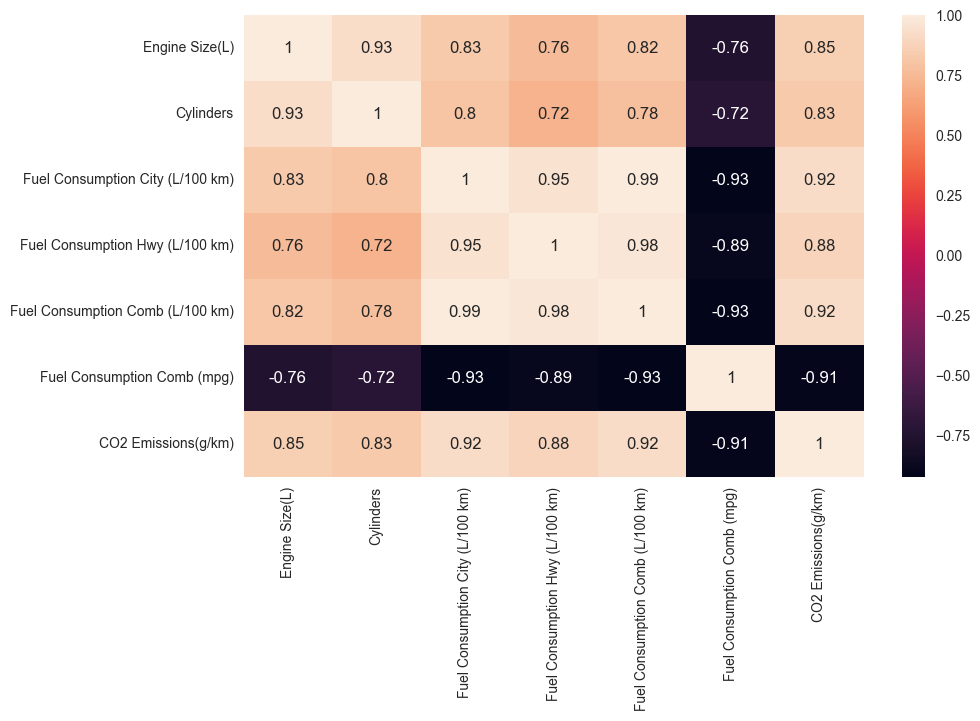

In [168]:
sns.heatmap(df.corr(),annot=True) 

In [169]:
df.duplicated().sum()

1103

In [170]:
df = df.drop_duplicates()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


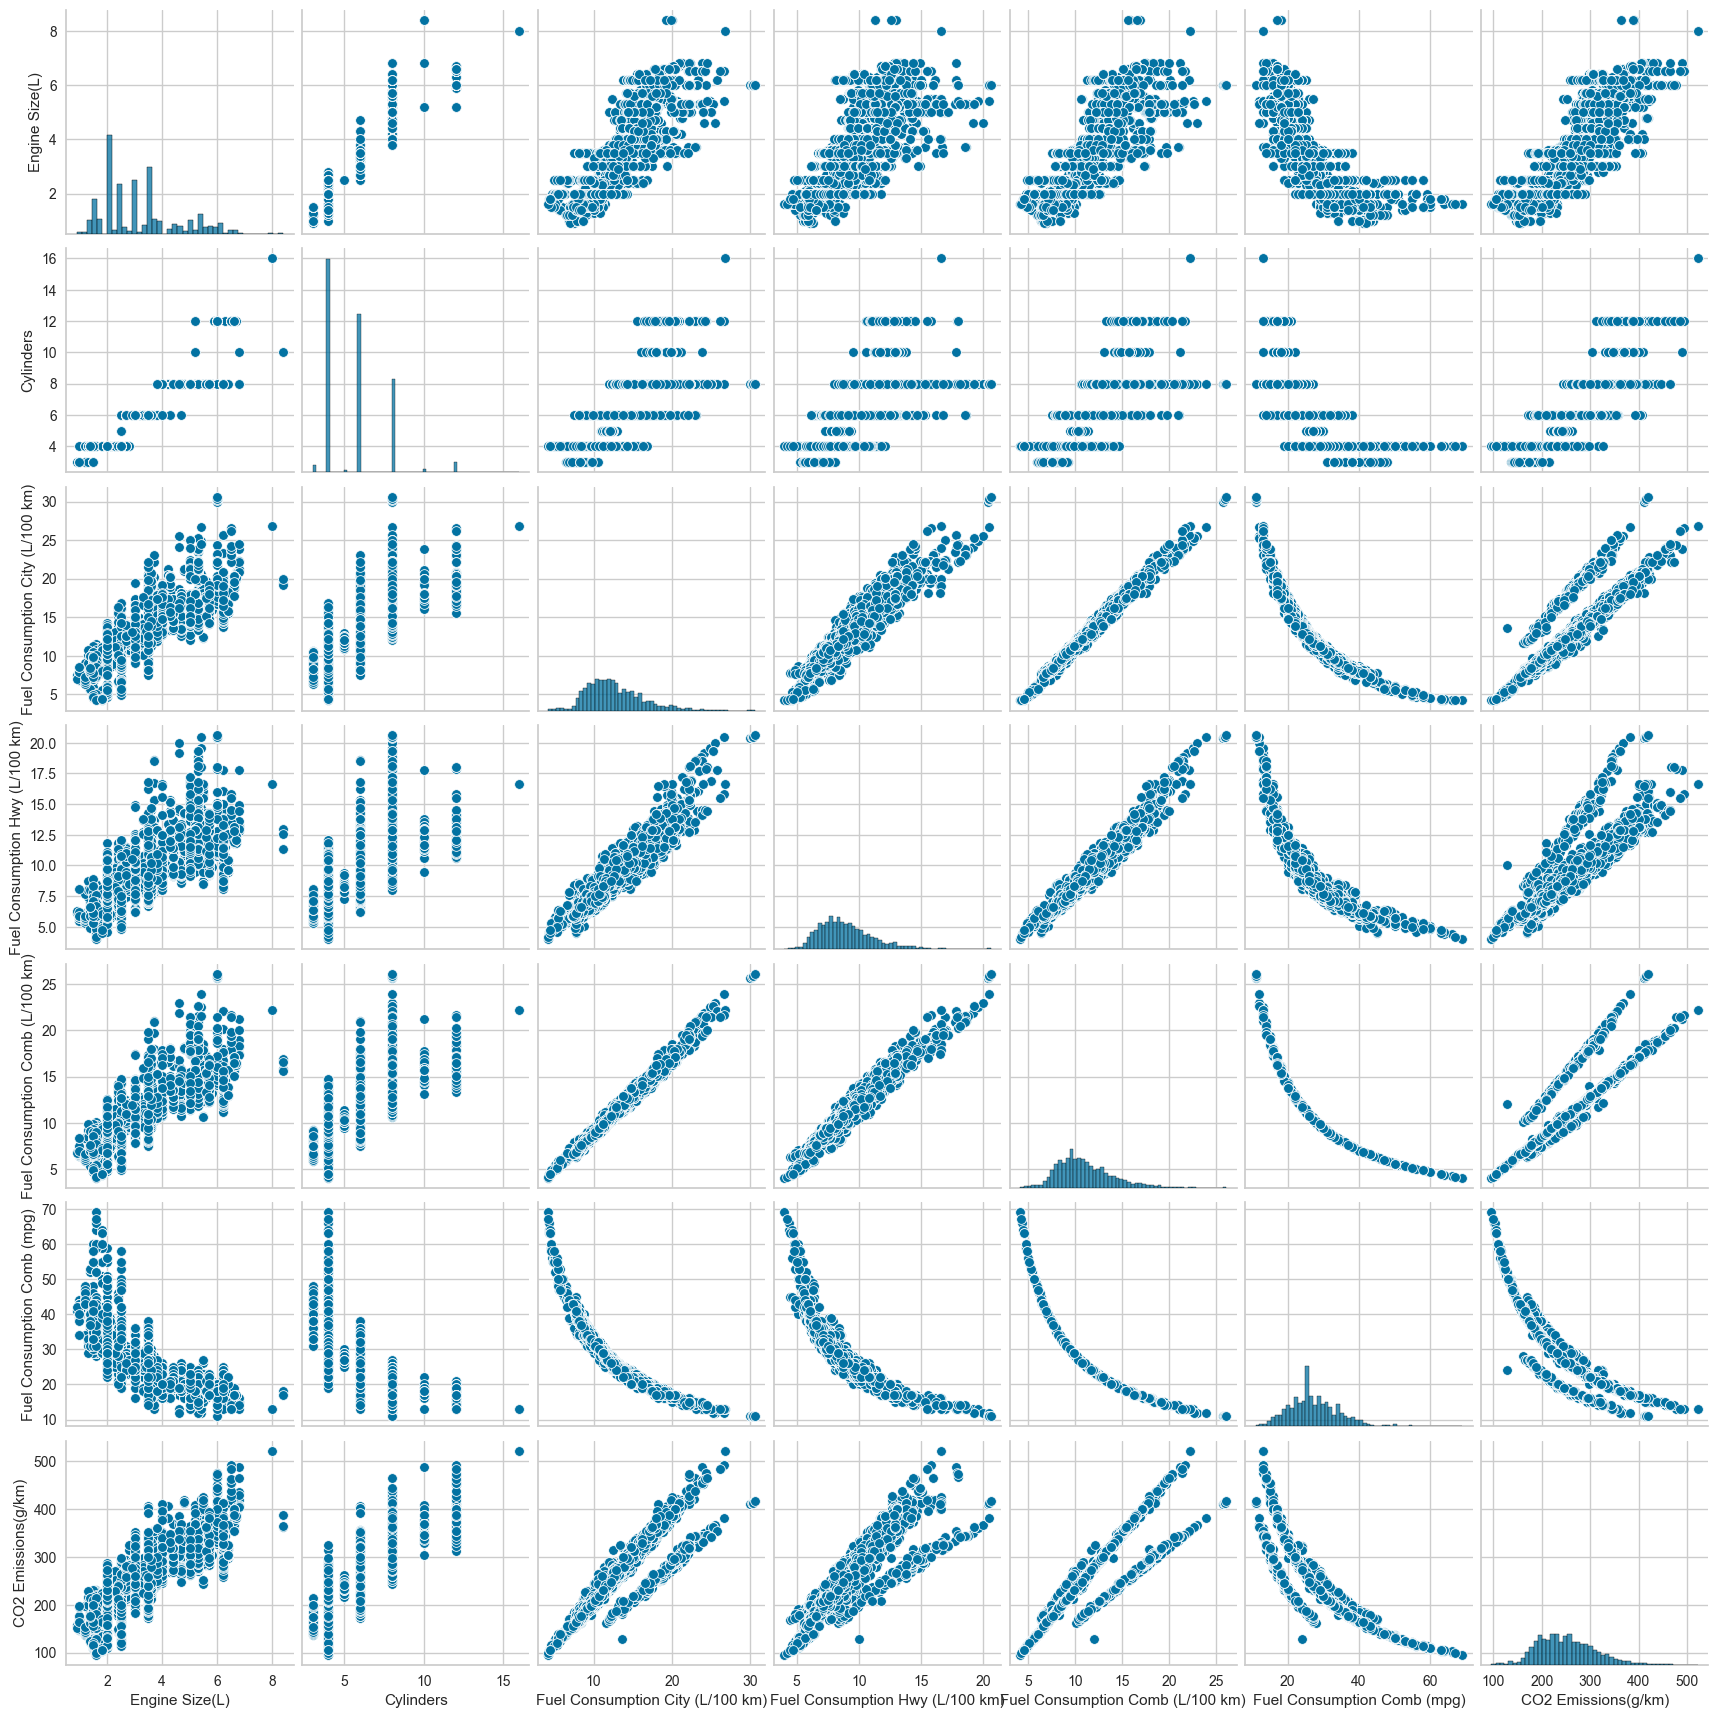

In [171]:
sns.pairplot(df)

In [172]:
df.rename(columns= { "Vehicle Class" : "vehicle_class", "Engine Size(L)": "engine_size", "Fuel Type": "feul_type",
                     "Fuel Consumption City (L/100 km)": "feul_cons_city","Fuel Consumption Hwy (L/100 km)" :"feul_cons_hwy",
                     "Fuel Consumption Comb (L/100 km)": "feul_cons_comb", "Fuel Consumption Comb (mpg)": "feul_cons_comb", 
                     "CO2 Emissions(g/km)": "co2_emission"}, inplace=True)

In [173]:
df.head()

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,feul_type,feul_cons_city,feul_cons_hwy,feul_cons_comb,feul_cons_comb,co2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


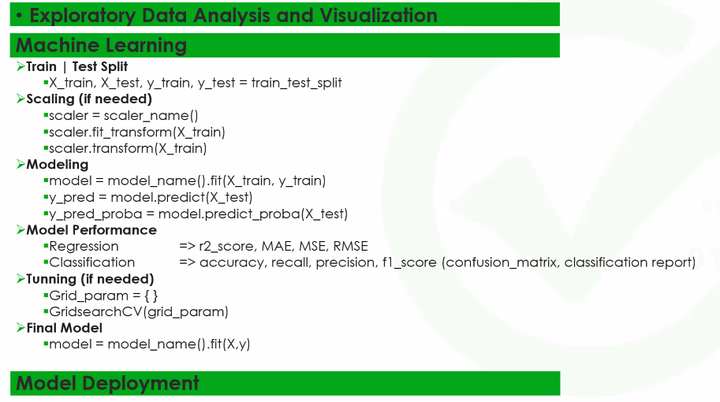

# Train /Test Split

In [174]:
X = df["engine_size"]
y = df["co2_emission"]

In [175]:
import statsmodels.api as sm

In [176]:
X = sm.add_constant(X)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling

In [179]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [180]:
scaler = StandardScaler()

In [181]:
scaler.fit(X_train) 

StandardScaler()

In [182]:
X_train_scale = scaler.transform(X_train) 
X_test_scale = scaler.transform(X_test)

In [183]:
X_train_scale

array([[ 0.        , -0.84946717],
       [ 0.        ,  0.91379859],
       [ 0.        ,  1.35461502],
       ...,
       [ 0.        , -0.84946717],
       [ 0.        , -0.84946717],
       [ 0.        , -0.48212013]])

# Simple Lineer Regresyon

In [184]:
df["engine_size"].corr(df["co2_emission"])

0.8548015655053497

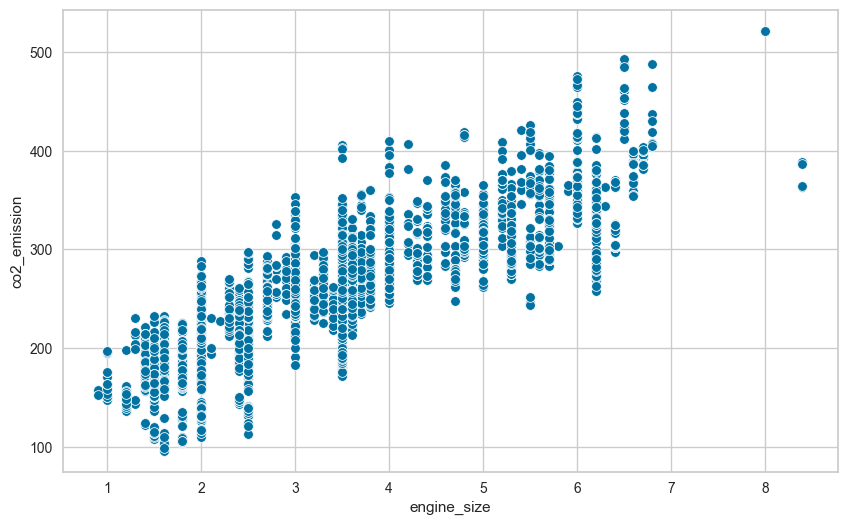

In [185]:
sns.scatterplot(x="engine_size", y= "co2_emission",data= df);

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
slr = LinearRegression()

In [188]:
slr.fit(X_train_scale,y_train)

LinearRegression()

In [189]:
slr.coef_

array([ 0.        , 50.49265836])

In [190]:
slr.intercept_

250.80616915422885

In [191]:
b0 = slr.intercept_
b1 = slr.coef_

In [192]:
# Predict manuel
y_train_pred =  b0 + b1 * X_train_scale
y_train_pred

array([[250.80616915, 207.91431376],
       [250.80616915, 296.94628899],
       [250.80616915, 319.2042828 ],
       ...,
       [250.80616915, 207.91431376],
       [250.80616915, 207.91431376],
       [250.80616915, 226.46264193]])

In [193]:
# Predict whith kod
y_test_pred = slr.predict(X_test_scale)
y_test_pred

array([245.0109701 , 245.0109701 , 267.26896391, ..., 311.78495153,
       200.49498249, 207.91431376])

In [194]:
y_train_pred = slr.predict(X_train_scale)
y_train_pred

array([207.91431376, 296.94628899, 319.2042828 , ..., 207.91431376,
       207.91431376, 226.46264193])

## Eval metrics

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [196]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [197]:
eval_metric(y_test,y_test_pred)

Model testing performance:
--------------------------------------
R2_score 	: 0.7316700768477529
MAE 		: 23.645582171230313
MSE 		: 968.3280260571065
RMSE 		: 31.117969504084076


In [198]:
eval_metric(y_train,y_train_pred)

Model testing performance:
--------------------------------------
R2_score 	: 0.7303755587668523
MAE 		: 23.16305195833031
MSE 		: 941.1730849777152
RMSE 		: 30.678544375144583


In [199]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [200]:
simple_linear = train_val(y_train, y_train_pred, y_test, y_test_pred, "simple_lr")
simple_linear 

,simple_lr_train,simple_lr_test
R2,0.730376,0.731670
mae,23.163052,23.645582
mse,941.173085,968.328026
rmse,30.678544,31.117970


## Cross-Validation

In [201]:
from sklearn.model_selection import cross_validate, cross_val_score

In [202]:
model = LinearRegression()
scores = cross_validate(model, X_train_scale, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [203]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.013000,0.006988,0.739478,-23.560419,-943.476857,-30.716068
2,0.008997,0.006004,0.753066,-23.520280,-976.383971,-31.247143
3,0.007998,0.005001,0.700640,-24.287244,-1042.435080,-32.286763
4,0.006997,0.006000,0.715110,-24.515127,-1037.661967,-32.212761
5,0.007005,0.004997,0.717184,-23.523208,-958.185657,-30.954574
6,0.006999,0.005005,0.749645,-22.548029,-867.688406,-29.456551
7,0.008009,0.004990,0.750523,-21.568799,-842.531873,-29.026400
8,0.007003,0.004993,0.734539,-21.010971,-790.571835,-28.117109
9,0.007008,0.002395,0.716767,-23.372514,-962.584346,-31.025543
10,0.000000,0.021600,0.715866,-23.795510,-996.406403,-31.565906


In [204]:
scores = pd.DataFrame(scores, index=range(1,11)) 
scores.iloc[:, 2:].mean()

test_r2                               0.729282
test_neg_mean_absolute_error        -23.170210
test_neg_mean_squared_error        -941.792639
test_neg_root_mean_squared_error    -30.660882
dtype: float64

### residual incelemesi ;

In [205]:
my_dict = {"Actual": y_test, "pred": y_test_pred, "residual": y_test - y_test_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
3003,322,245.010970,76.989030
5970,242,245.010970,-3.010970
2394,300,267.268964,32.731036
6020,275,267.268964,7.731036
3416,245,245.010970,-0.010970
2404,220,207.914314,12.085686
2324,284,245.010970,38.989030
3286,270,245.010970,24.989030
4307,274,263.559298,10.440702
561,306,319.204283,-13.204283


In [206]:
compare["residual"].sum()

905.3346361726756

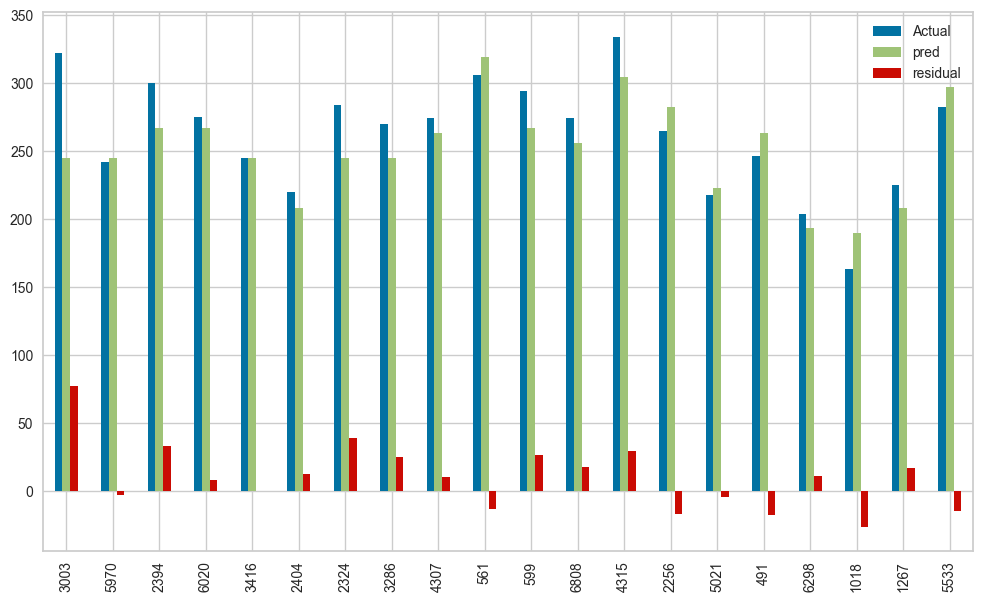

In [207]:
compare.head(20).plot(kind="bar", figsize = (12,7))
plt.show()

In [208]:
residual = y_test - y_test_pred
residual

3003    76.989030
5970    -3.010970
2394    32.731036
6020     7.731036
3416    -0.010970
          ...    
6249   -10.914314
2571    26.924349
3162    -8.784952
2459    -5.494982
7210   -13.914314
Name: co2_emission, Length: 1257, dtype: float64

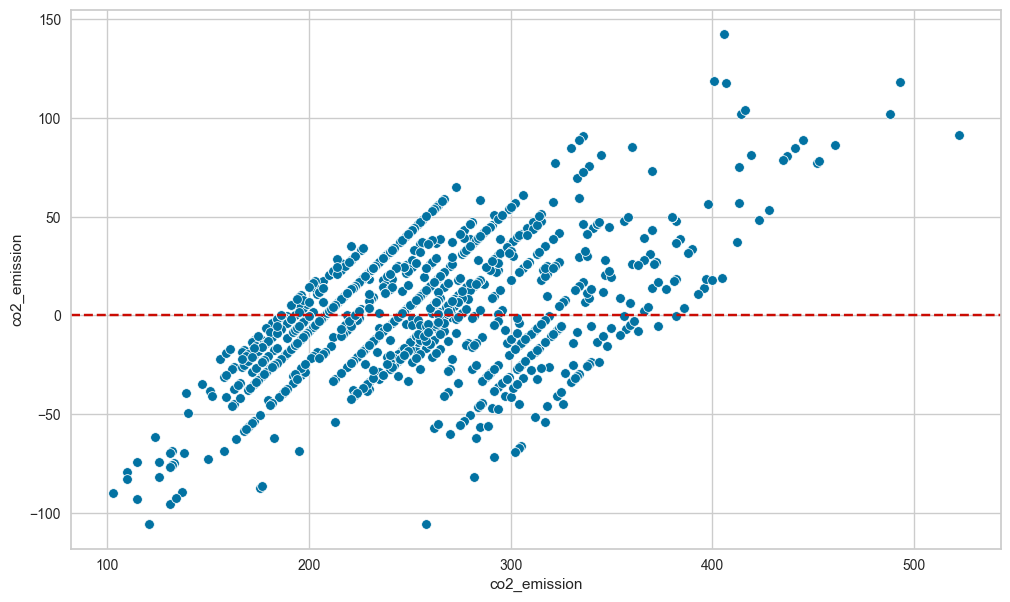

In [209]:
plt.figure(figsize = (12,7))
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color="r", linestyle = "--")
plt.show()

residlerin 0 ekseni etrafında dağılmasını ve bir petern izlememesini beklerim fakat burada bir patern gözlemleniyor. Başka yöntemlerle modelimi iyileştirmem gerekiyor.

In [210]:
from yellowbrick.regressor import ResidualsPlot

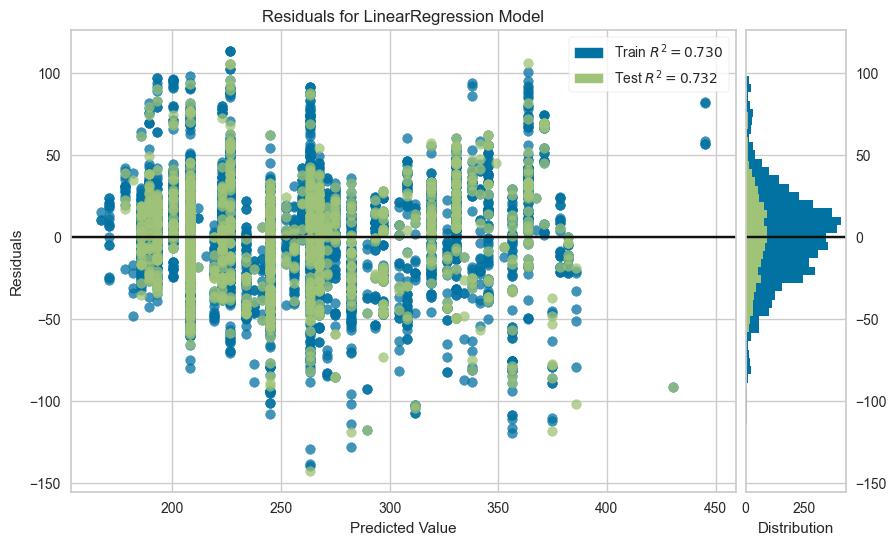

In [211]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [212]:
from yellowbrick.regressor import PredictionError

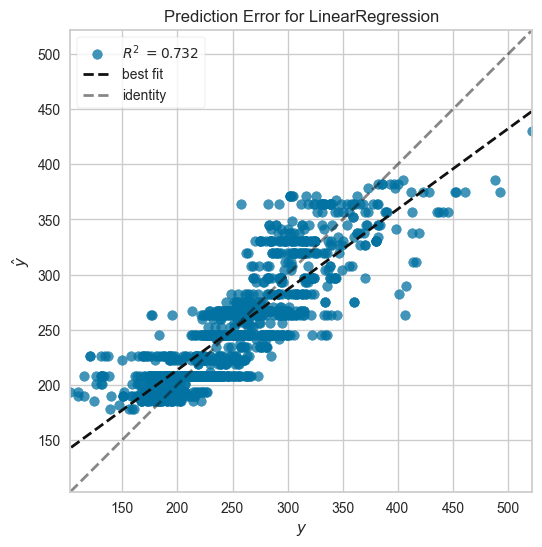

In [213]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Multiple Lineer Regression

MLR Engine Size(L), Fuel Consumption Comb (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption City (L/100 km), CO2 Emissions(g/km) columnlarını kullanılacak

In [214]:
df.columns

Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'feul_type', 'feul_cons_city', 'feul_cons_hwy',
       'feul_cons_comb', 'feul_cons_comb', 'co2_emission'],
      dtype='object')

In [215]:
X = df[["engine_size","feul_cons_comb","feul_cons_hwy","feul_cons_city"]]
y = df["co2_emission"]

## Train / test Split & Scale

In [216]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [218]:
scaler = StandardScaler()

In [219]:
X_train_scale = scaler.fit_transform(X_train)
X_train_scale

array([[-0.84946717, -0.61200082,  0.49144898, -0.37876225, -0.72924759],
       [ 0.91379859,  0.57438064, -0.7518122 ,  0.32219726,  0.67715608],
       [ 1.35461502,  0.4726908 , -0.61367207,  0.19076735,  0.649028  ],
       ...,
       [-0.84946717, -0.78148388,  0.62958911, -0.729242  , -0.78550374],
       [-0.84946717, -1.01876018,  1.04400951, -0.90448188, -1.06678447],
       [-0.48212013, -0.8153805 ,  0.76772925, -0.729242  , -0.86988796]])

In [220]:
X_test_scale = scaler.transform(X_test)
X_test_scale

array([[-0.1147731 ,  0.33710435, -0.47553194,  0.4098172 ,  0.28336305],
       [-0.1147731 , -0.20524146, -0.06111154, -0.24733234, -0.1948142 ],
       [ 0.32604334,  0.60827725, -0.7518122 ,  0.58505707,  0.62089993],
       ...,
       [ 1.20767621,  0.64217386, -0.7518122 ,  0.32219726,  0.78966837],
       [-0.99640598, -0.91707034,  0.90586938, -1.03591178, -0.84175988],
       [-0.84946717, -0.91707034,  0.90586938, -0.86067191, -0.89801603]])

In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
mlr = LinearRegression()  

In [223]:
mlr.fit(X_train_scale,y_train)

LinearRegression()

In [224]:
y_train_pred = mlr.predict(X_train_scale)
y_train_pred

array([213.73998276, 294.32329089, 298.38117101, ..., 207.17144472,
       193.09737775, 209.60977967])

In [225]:
y_test_pred = mlr.predict(X_test_scale)
y_test_pred

array([265.93033374, 246.38781376, 285.34512673, ..., 300.82978195,
       194.56529019, 198.60982272])

In [226]:
eval_metric(y_test,y_test_pred)

Model testing performance:
--------------------------------------
R2_score 	: 0.8881902372474154
MAE 		: 12.480421270021424
MSE 		: 403.4903211249136
RMSE 		: 20.087068505008727


In [227]:
eval_metric(y_train,y_train_pred)

Model testing performance:
--------------------------------------
R2_score 	: 0.8976456074382264
MAE 		: 11.799777219169554
MSE 		: 357.28659823196085
RMSE 		: 18.902026299631498


In [228]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_test_pred, "multi")
multiple_linear

,multi_train,multi_test
R2,0.897646,0.888190
mae,11.799777,12.480421
mse,357.286598,403.490321
rmse,18.902026,20.087069


In [229]:
model = LinearRegression()
scores = cross_validate(model, X_train_scale, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [230]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()  # CV sonuçları tarin ile elde edilen sonuçlar ile uyumlu. 
                              #Ama modelimi daha iyi hale getirmek için Regülarizasyon işlemleri yapacağız.

test_r2                               0.896786
test_neg_mean_absolute_error        -11.824600
test_neg_mean_squared_error        -359.474493
test_neg_root_mean_squared_error    -18.923795
dtype: float64

In [231]:
result_compare = pd.concat([simple_linear, multiple_linear], axis=1)
result_compare

,simple_lr_train,simple_lr_test,multi_train,multi_test
R2,0.730376,0.731670,0.897646,0.888190
mae,23.163052,23.645582,11.799777,12.480421
mse,941.173085,968.328026,357.286598,403.490321
rmse,30.678544,31.117970,18.902026,20.087069


In [232]:
mlr_df = pd.DataFrame(mlr.coef_,columns= ["ridge_model.coef_"]) 
mlr_df  

,ridge_model.coef_
0,18.632167
1,-14.447128
2,-24.526519
3,13.192829
4,17.867660


In [233]:
mlr.coef_

array([ 18.63216742, -14.44712849, -24.52651944,  13.19282867,
        17.86765991])

# Regülarizasyon

## Ridge(L2)

In [234]:
from sklearn.linear_model import Ridge

In [235]:
ridge_model = Ridge(alpha=1, random_state=42)

In [236]:
ridge_model.fit(X_train_scale,y_train)

Ridge(alpha=1, random_state=42)

In [237]:
y_train_pred = ridge_model.predict(X_train_scale)
y_train_pred

array([213.77528015, 294.47473049, 298.08246428, ..., 207.08812856,
       193.14172108, 209.79076521])

In [238]:
y_test_pred = ridge_model.predict(X_test_scale)
y_test_pred

array([266.00333426, 246.49886242, 285.25341379, ..., 300.90155068,
       194.59578294, 198.34894693])

In [239]:
rs = train_val(y_train, y_train_pred, y_test, y_test_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs 

,ridge_train,ridge_test
R2,0.897637,0.888268
mae,11.798138,12.474170
mse,357.315747,403.211453
rmse,18.902797,20.080126


In [240]:
pd.concat([simple_linear, multiple_linear,rs],axis = 1) # multiple l reg ile sonuçlar hemen hemen aynı.
                                        # CV ve hyper parametrelerle skoru iyiliştirmek için mücadeleye devam edeceğiz

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_train,ridge_test
R2,0.730376,0.731670,0.897646,0.888190,0.897637,0.888268
mae,23.163052,23.645582,11.799777,12.480421,11.798138,12.474170
mse,941.173085,968.328026,357.286598,403.490321,357.315747,403.211453
rmse,30.678544,31.117970,18.902026,20.087069,18.902797,20.080126


### ridge whith CV

In [241]:
model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scale, y_train,
                      scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [242]:
scores = pd.DataFrame(scores, index=range(1,11)) # modelim CV ye uyumlu 
scores.iloc[:, 2:].mean() 

test_r2                               0.896791
test_neg_mean_absolute_error        -11.820854
test_neg_mean_squared_error        -359.457301
test_neg_root_mean_squared_error    -18.923494
dtype: float64

In [243]:
rm_df = pd.DataFrame(ridge_model.coef_,columns= ["ridge_model.coef_"]) 
rm_df  

,ridge_model.coef_
0,18.621916
1,-2.364516
2,-24.484575
3,8.982880
4,9.906064


### Choosing best alpha value whith Cross - Validation

In [244]:
alpha_space = np.linspace(0.01,1,100) 
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [245]:
from sklearn.linear_model import RidgeCV

In [246]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [247]:
ridge_cv_model.fit(X_train_scale, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [248]:
ridge_cv_model.alpha_

0.45

In [249]:
ridge_cv_model.best_score_ 

-18.923429153891966

In [250]:
y_test_pred = ridge_cv_model.predict(X_test_scale)
y_train_pred = ridge_cv_model.predict(X_train_scale)

In [251]:
rcs = train_val(y_train, y_train_pred, y_test, y_test_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.897642,0.888243
mae,11.798715,12.476391
mse,357.299909,403.298133
rmse,18.902378,20.082284


In [252]:
pd.concat([simple_linear, multiple_linear,rcs], axis=1) # gözle görülür bir iyileşme olmadı.

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_cv_train,ridge_cv_test
R2,0.730376,0.731670,0.897646,0.888190,0.897642,0.888243
mae,23.163052,23.645582,11.799777,12.480421,11.798715,12.476391
mse,941.173085,968.328026,357.286598,403.490321,357.299909,403.298133
rmse,30.678544,31.117970,18.902026,20.087069,18.902378,20.082284


In [253]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns =["ridge_cv_coef_0.45"])

In [254]:
pd.concat([ mlr_df,rm_df, rcm_df], axis = 1)

,ridge_model.coef_,ridge_model.coef_,ridge_cv_coef_0.45
0,18.632167,18.621916,18.627674
1,-14.447128,-2.364516,-6.274133
2,-24.526519,-24.484575,-24.504666
3,13.192829,8.982880,10.346024
4,17.867660,9.906064,12.473497


## Lasso (L1)

In [255]:
from sklearn.linear_model import Lasso, LassoCV

In [256]:
lasso_model = Lasso(alpha=1.0, random_state =42)
lasso_model.fit(X_train_scale, y_train)

Lasso(random_state=42)

In [257]:
y_train_pred = lasso_model.predict(X_train_scale)
y_test_pred = lasso_model.predict(X_test_scale)

In [258]:
lss = train_val(y_train, y_train_pred, y_test, y_test_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.897260,0.887706
mae,11.900503,12.525013
mse,358.634167,405.238451
rmse,18.937639,20.130535


In [259]:
pd.concat([simple_linear, multiple_linear,rs,rcs,lss], axis = 1)

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.730376,0.731670,0.897646,0.888190,0.897637,0.888268,0.897642,0.888243,0.897260,0.887706
mae,23.163052,23.645582,11.799777,12.480421,11.798138,12.474170,11.798715,12.476391,11.900503,12.525013
mse,941.173085,968.328026,357.286598,403.490321,357.315747,403.211453,357.299909,403.298133,358.634167,405.238451
rmse,30.678544,31.117970,18.902026,20.087069,18.902797,20.080126,18.902378,20.082284,18.937639,20.130535


In [260]:
model = Lasso(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scale, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                   'neg_root_mean_squared_error'], cv = 10)

In [261]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                               0.896457
test_neg_mean_absolute_error        -11.924130
test_neg_mean_squared_error        -360.731011
test_neg_root_mean_squared_error    -18.957721
dtype: float64

In [262]:
lasso_model.coef_ 

array([ 17.96053   ,  13.84865442, -23.89779208,   2.56652583,
         0.        ])

###   Choosing best alpha value whith Cross - Validation

In [263]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 10,max_iter= 100000, random_state=42)

In [264]:
lasso_cv_model.fit(X_train_scale,y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000, random_state=42)

In [265]:
lasso_cv_model.alpha_

0.02

In [266]:
y_test_pred = lasso_cv_model.predict(X_test_scale)
y_train_pred = lasso_cv_model.predict(X_train_scale)

In [267]:
lcs = train_val(y_train, y_train_pred, y_test, y_test_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.897634,0.888271
mae,11.799445,12.473741
mse,357.328604,403.197231
rmse,18.903137,20.079772


In [268]:
pd.concat([simple_linear, multiple_linear,rs,rcs,lcs,], axis = 1) # çok az da olsa lasso da iyileşme var

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.730376,0.731670,0.897646,0.888190,0.897637,0.888268,0.897642,0.888243,0.897634,0.888271
mae,23.163052,23.645582,11.799777,12.480421,11.798138,12.474170,11.798715,12.476391,11.799445,12.473741
mse,941.173085,968.328026,357.286598,403.490321,357.315747,403.211453,357.299909,403.298133,357.328604,403.197231
rmse,30.678544,31.117970,18.902026,20.087069,18.902797,20.080126,18.902378,20.082284,18.903137,20.079772


# ElasticNet

In [269]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [270]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # alfa default değeri 1 oluyor, 
                             #l1 radio default 0,5 olursa eşit ağrlık verir rich ve lasso için.0 a yaklaşırsa rich e yaklaşır.
                             # 1 e yaklaştıkça lasso gibi davranır
elastic_model.fit(X_train_scale, y_train)

ElasticNet(alpha=1, random_state=42)

In [271]:
y_test_pred = elastic_model.predict(X_test_scale)
y_train_pred = elastic_model.predict(X_train_scale)

In [272]:
es = train_val(y_train, y_train_pred, y_test, y_test_pred,"elasticN")
es

,elasticN_train,elasticN_test
R2,0.879305,0.871335
mae,14.038330,14.547995
mse,421.309223,464.315841
rmse,20.525818,21.547989


In [273]:
pd.concat([simple_linear, multiple_linear,rs,rcs,lcs,es], axis = 1)

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elasticN_train,elasticN_test
R2,0.730376,0.731670,0.897646,0.888190,0.897637,0.888268,0.897642,0.888243,0.897634,0.888271,0.879305,0.871335
mae,23.163052,23.645582,11.799777,12.480421,11.798138,12.474170,11.798715,12.476391,11.799445,12.473741,14.038330,14.547995
mse,941.173085,968.328026,357.286598,403.490321,357.315747,403.211453,357.299909,403.298133,357.328604,403.197231,421.309223,464.315841
rmse,30.678544,31.117970,18.902026,20.087069,18.902797,20.080126,18.902378,20.082284,18.903137,20.079772,20.525818,21.547989


In [274]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scale, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [275]:
scores = pd.DataFrame(scores, index=range(1,11))  # lasso ve rich e göre düşük kaldı
scores.iloc[:, 2:].mean()

test_r2                               0.878696
test_neg_mean_absolute_error        -14.047188
test_neg_mean_squared_error        -422.406848
test_neg_root_mean_squared_error    -20.521042
dtype: float64

In [276]:
elastic_model.coef_ 

array([ 12.04802278,   9.51389605, -12.31684097,   8.5003639 ,
         9.87748223])

In [277]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10,
                                max_iter = 100000,random_state=42)

In [278]:
elastic_cv_model.fit(X_train_scale,y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [279]:
elastic_cv_model.l1_ratio_  # lasso gibi davranmış

1.0

In [280]:
elastic_cv_model.alpha_

0.02

In [281]:
elastic_cv_model.coef_

array([ 18.61892576,   0.        , -24.51209325,   8.16690751,
         8.29056012])

In [282]:
y_test_pred = elastic_cv_model.predict(X_test_scale)
y_train_pred = elastic_cv_model.predict(X_train_scale)

In [283]:
ecs = train_val(y_train, y_train_pred, y_test, y_test_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.897634,0.888271
mae,11.799445,12.473741
mse,357.328604,403.197231
rmse,18.903137,20.079772


In [284]:
pd.concat([simple_linear, multiple_linear,rs,rcs,lcs,es,ecs], axis = 1) # lasso ile aynı sonuçlar çıktı zaten l1_ratio =1  çıkması da bunu gösteriyordu

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elasticN_train,elasticN_test,elastic_cv_train,elastic_cv_test
R2,0.730376,0.731670,0.897646,0.888190,0.897637,0.888268,0.897642,0.888243,0.897634,0.888271,0.879305,0.871335,0.897634,0.888271
mae,23.163052,23.645582,11.799777,12.480421,11.798138,12.474170,11.798715,12.476391,11.799445,12.473741,14.038330,14.547995,11.799445,12.473741
mse,941.173085,968.328026,357.286598,403.490321,357.315747,403.211453,357.299909,403.298133,357.328604,403.197231,421.309223,464.315841,357.328604,403.197231
rmse,30.678544,31.117970,18.902026,20.087069,18.902797,20.080126,18.902378,20.082284,18.903137,20.079772,20.525818,21.547989,18.903137,20.079772


# GRİD SEARCH

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
elastic_model = ElasticNet(max_iter = 100000, random_state = 42)

In [287]:
param_grid = {"alpha":[0.01,0.02, 0.012, 0.2, 0.5, 0.6, 0.7, 1],  # bu kombinasyonlardan en iyisini seç
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [288]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [289]:
grid_model.fit(X_train_scale,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.02, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.01, 0.02, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [290]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 1}

In [291]:
y_test_pred = grid_model.predict(X_test_scale) #ElasticNet(alpha=0.01, l1_ratio=0.1) olarakta yazabilirsiniz aynı anlama geliyor.
y_train_pred = grid_model.predict(X_train_scale)

In [292]:
grid_s = train_val(y_train, y_train_pred, y_test, y_test_pred, "grid_search")
grid_s

,grid_search_train,grid_search_test
R2,0.897634,0.888275
mae,11.798965,12.473522
mse,357.328335,403.184067
rmse,18.903130,20.079444


In [293]:
pd.concat([simple_linear, multiple_linear,rs,rcs,lcs,es,ecs,grid_s], axis = 1) # modelim lasso alpha sı da 0.012 olmalı

,simple_lr_train,simple_lr_test,multi_train,multi_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elasticN_train,elasticN_test,elastic_cv_train,elastic_cv_test,grid_search_train,grid_search_test
R2,0.730376,0.731670,0.897646,0.888190,0.897637,0.888268,0.897642,0.888243,0.897634,0.888271,0.879305,0.871335,0.897634,0.888271,0.897634,0.888275
mae,23.163052,23.645582,11.799777,12.480421,11.798138,12.474170,11.798715,12.476391,11.799445,12.473741,14.038330,14.547995,11.799445,12.473741,11.798965,12.473522
mse,941.173085,968.328026,357.286598,403.490321,357.315747,403.211453,357.299909,403.298133,357.328604,403.197231,421.309223,464.315841,357.328604,403.197231,357.328335,403.184067
rmse,30.678544,31.117970,18.902026,20.087069,18.902797,20.080126,18.902378,20.082284,18.903137,20.079772,20.525818,21.547989,18.903137,20.079772,18.903130,20.079444


# Final Model

In [294]:
final_scaler = StandardScaler()

In [295]:
X_scale = final_scaler.fit_transform(X)

In [296]:
final_model = Lasso(alpha = 0.012)

In [297]:
final_model.fit(X_scale,y)

Lasso(alpha=0.012)